## Import functions and constants

In [ ]:
import warnings
from main_code import *

Supress specific warnings

In [ ]:
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
warnings.filterwarnings("ignore", message="Polyfit may be poorly conditioned")

## Load in, blur and resample the data

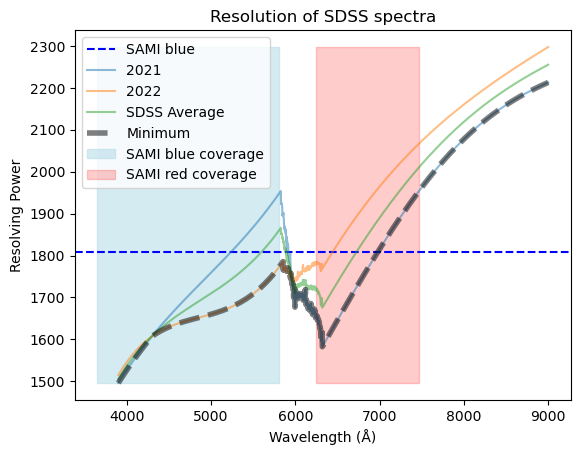

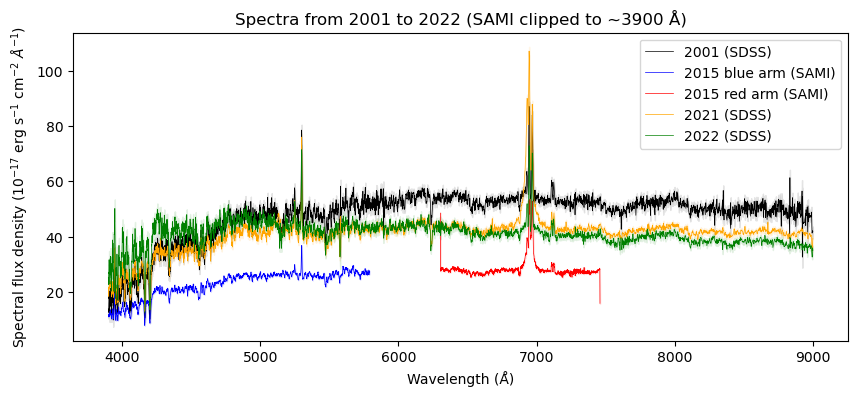

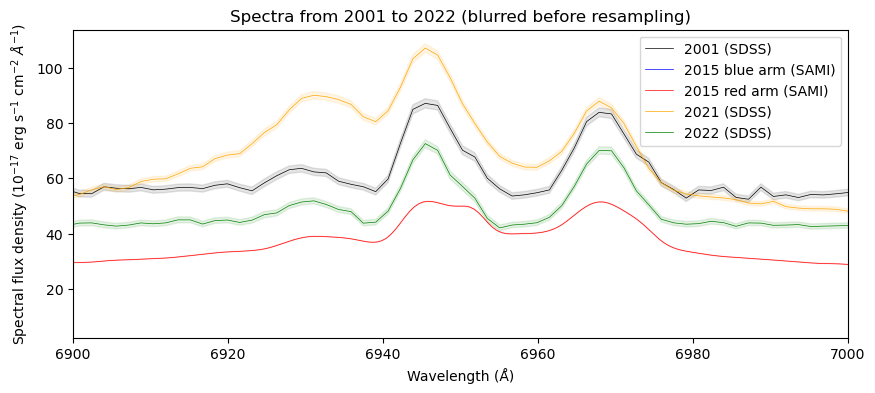

/opt/anaconda3/envs/denison/lib/python3.11/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning: Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).
  warnings.warn(


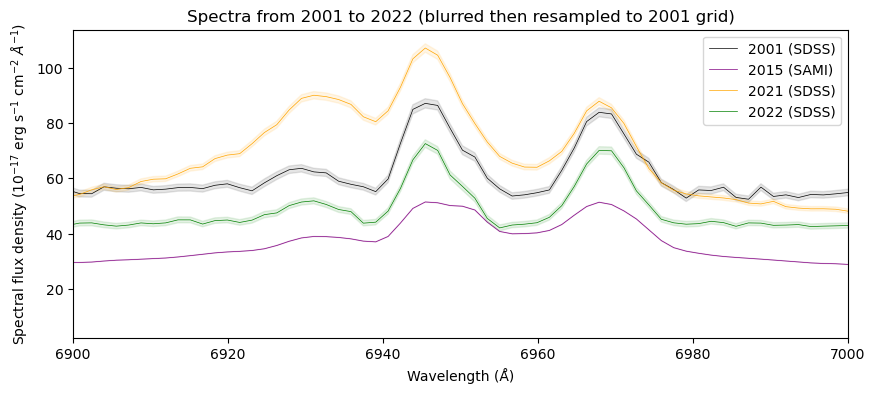

In [2]:
data = data_reading.get_adjusted_data(
    blur_before_resampling=True,
    plot_res_coverage=True,
    plot_clipped=True,
    plot_just_blurred=True,
    plot_just_resampled=True,
    plot_resampled_and_blurred=True,
    plot_errors=True,
    blurred_xlim=(6900, 7000),
    resampled_xlim=(6900, 7000),
    resampled_and_blurred_xlim=(6900, 7000)
)
unadjusted_data = data_reading.get_adjusted_data(return_as_is=True)

(
    (ua_lam01, ua_flux01, ua_err01),
    (ua_lam15_blue, ua_flux15_blue, ua_err15_blue),
    (ua_lam15_red, ua_flux15_red, ua_err15_red),
    (ua_lam21, ua_flux21, ua_err21),
    (ua_lam22, ua_flux22, ua_err22)
) = unadjusted_data

lam, (data01, data15, data21, data22) = data
flux01, err01 = data01
flux15, err15 = data15
flux21, err21 = data21
flux22, err22 = data22

## Qualitatively inspecting a sensible region of Balmer emission to ignore

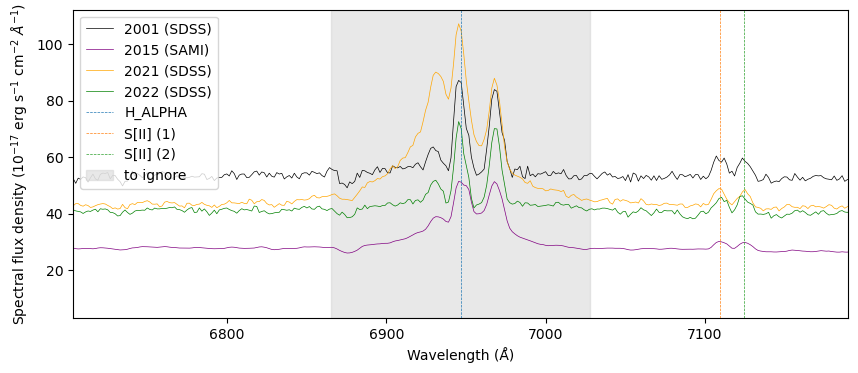

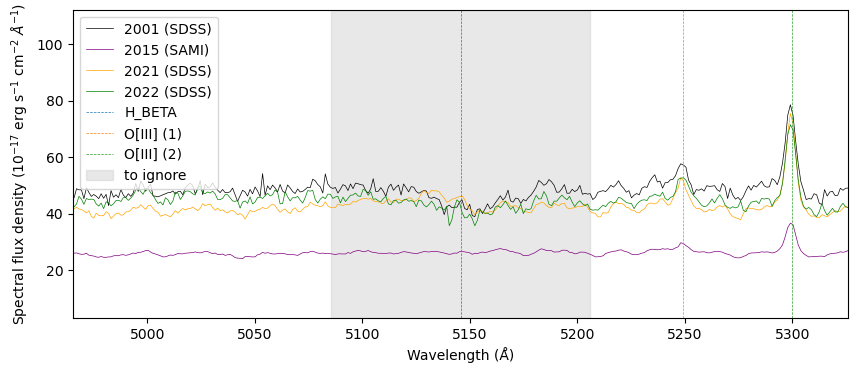

Width of wavelengths to ignore around Hα: 162.20 Å
Width of wavelengths to ignore around Hβ: 120.15 Å


In [3]:
plot_width_vel = VEL_PLOT_WIDTH
selection_width_vel = VEL_TO_IGNORE_WIDTH

h_alpha_lam_bounds = helpers.get_lam_bounds(H_ALPHA, selection_width_vel, width_is_vel=True)
h_beta_lam_bounds = helpers.get_lam_bounds(H_BETA, selection_width_vel, width_is_vel=True)
# plot_width_ang = 400

plotting.plot_spectra(
    lam, lam, lam, lam,
    flux01,
    flux15,
    flux21,
    flux22,
    plot_errors=False,
    ions = {"H_ALPHA": H_ALPHA, "S[II] (1)": SII_1, "S[II] (2)": SII_2},
    x_bounds = helpers.get_lam_bounds(H_ALPHA, plot_width_vel, width_is_vel=True),
    fill_between_bounds=h_alpha_lam_bounds,
    fill_between_label="to ignore",
    legend_loc="upper left"
)

plotting.plot_spectra(
    lam, lam, lam, lam,
    flux01,
    flux15,
    flux21,
    flux22,
    plot_errors=False,
    ions = {"H_BETA": H_BETA, "O[III] (1)": OIII_1, "O[III] (2)": OIII_2},
    x_bounds = helpers.get_lam_bounds(H_BETA, plot_width_vel, width_is_vel=True),
    fill_between_bounds=h_beta_lam_bounds,
    fill_between_label="to ignore",
    legend_loc="upper left"
)

print(f"Width of wavelengths to ignore around Hα: {h_alpha_lam_bounds[1] - h_alpha_lam_bounds[0]:.2f} Å")
print(f"Width of wavelengths to ignore around Hβ: {h_beta_lam_bounds[1] - h_beta_lam_bounds[0]:.2f} Å")

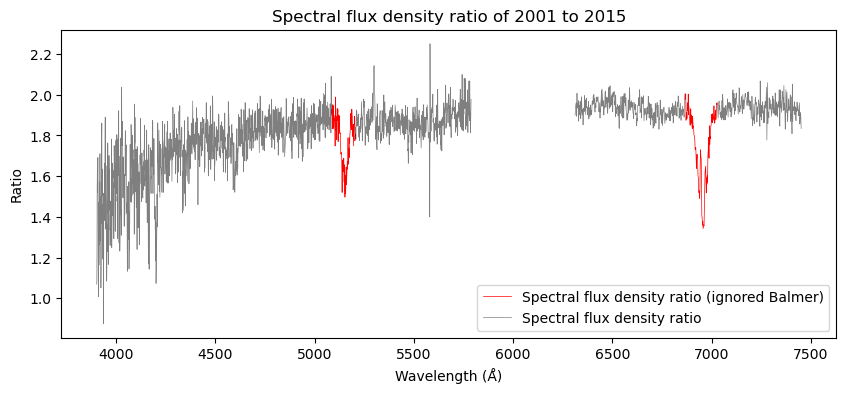

/Users/o_thorp/Downloads/my_stuff/Uni/other/scholarships/denison_2026/oli/main_code/polynomial_fit.py:24: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(new_lambdas[valid_mask], new_vals[valid_mask], degree)


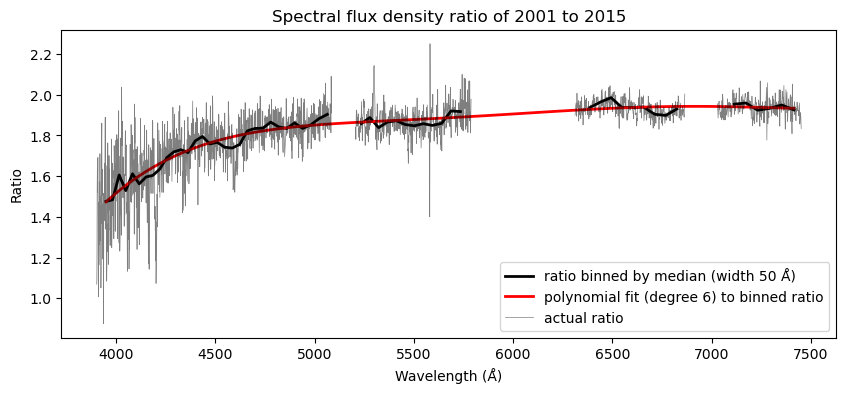

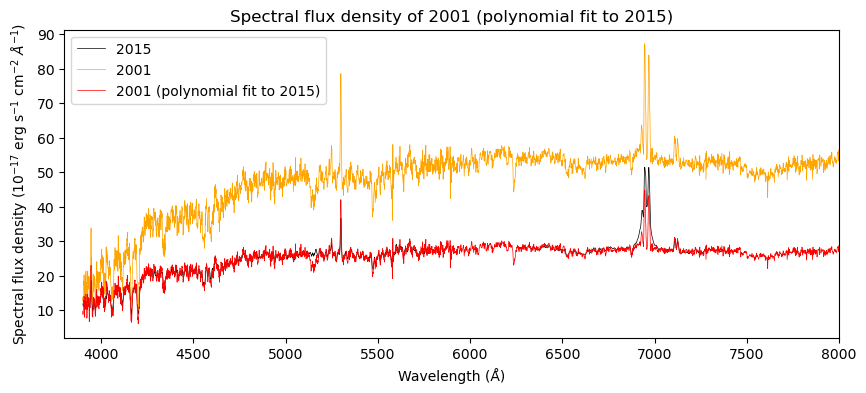

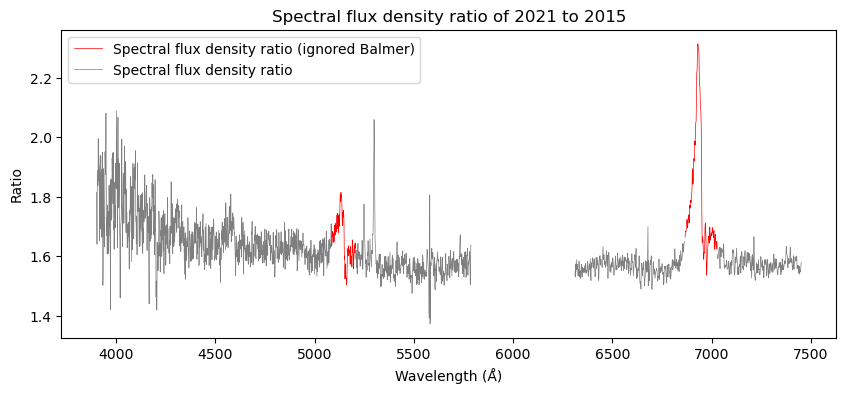

/Users/o_thorp/Downloads/my_stuff/Uni/other/scholarships/denison_2026/oli/main_code/polynomial_fit.py:24: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(new_lambdas[valid_mask], new_vals[valid_mask], degree)


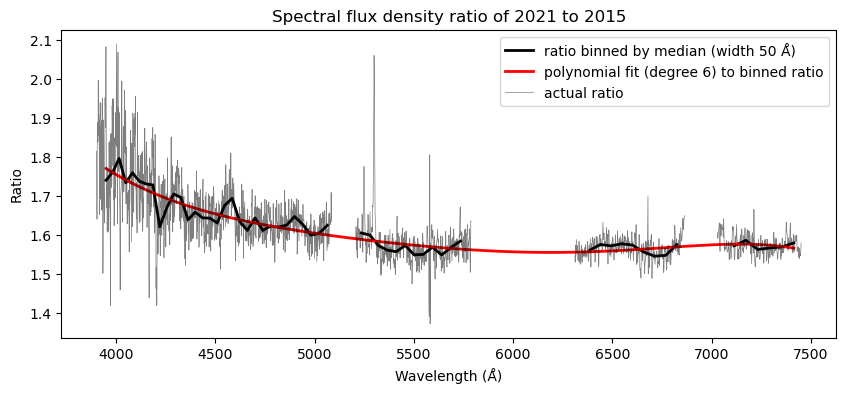

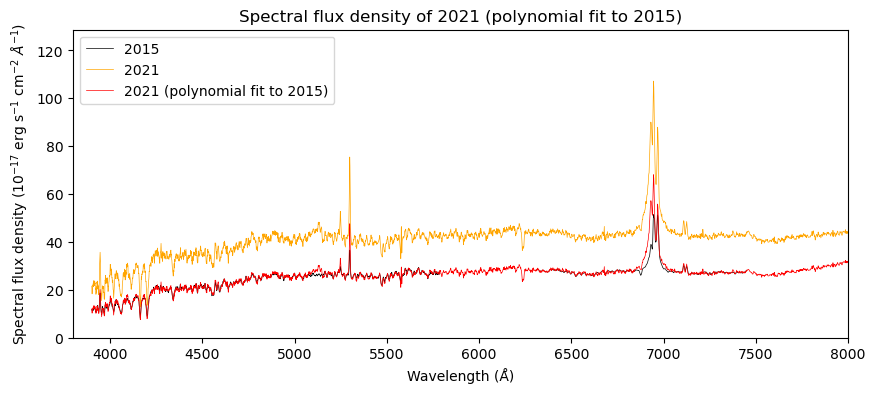

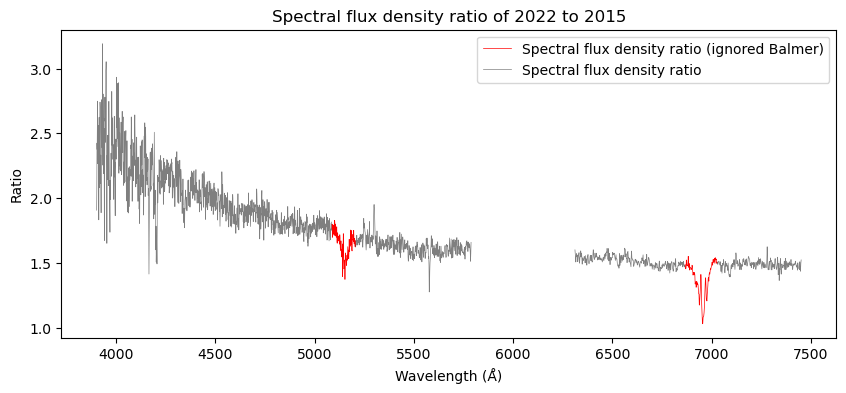

/Users/o_thorp/Downloads/my_stuff/Uni/other/scholarships/denison_2026/oli/main_code/polynomial_fit.py:24: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(new_lambdas[valid_mask], new_vals[valid_mask], degree)


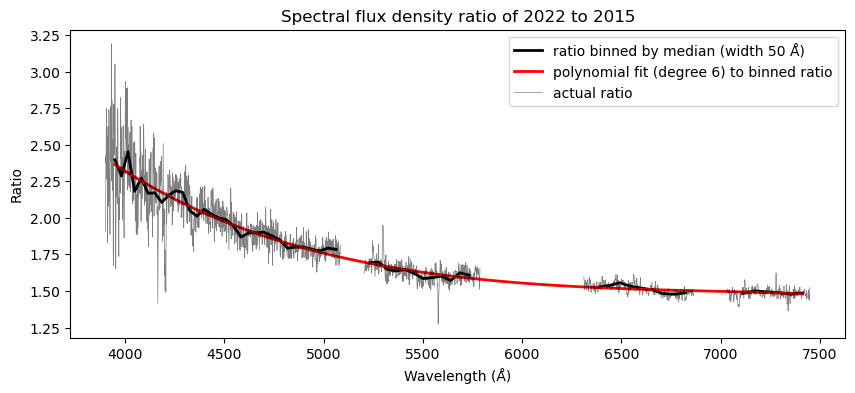

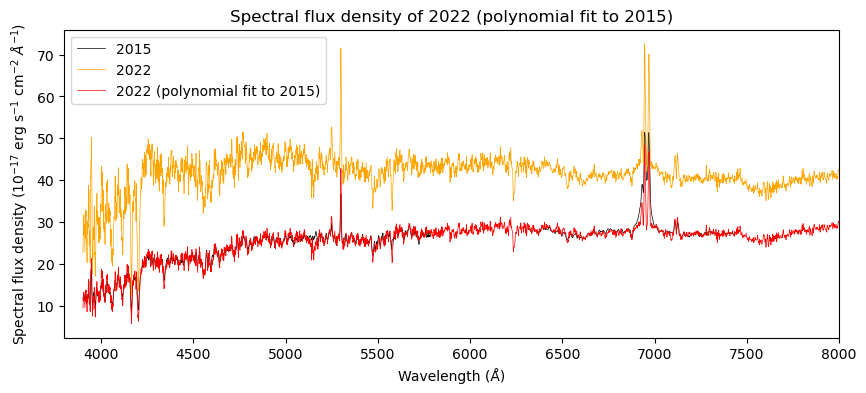

In [4]:
_, adjusted_01_flux_15, adjusted_01_err_15 = polynomial_fit.apply_poly_fit(data=data, year_to_adjust=2001)
# same as adjusted_15_flux_15, adjusted_15_err_15 = flux15, err15
_, adjusted_15_flux_15, adjusted_15_err_15 = polynomial_fit.apply_poly_fit(data=data, year_to_adjust=2015)
#
_, adjusted_21_flux_15, adjusted_21_err_15 = polynomial_fit.apply_poly_fit(data=data, year_to_adjust=2021)
_, adjusted_22_flux_15, adjusted_22_err_15 = polynomial_fit.apply_poly_fit(data=data, year_to_adjust=2022)

## Check polynomial fitted spectra and uncertainties around H-$\alpha$

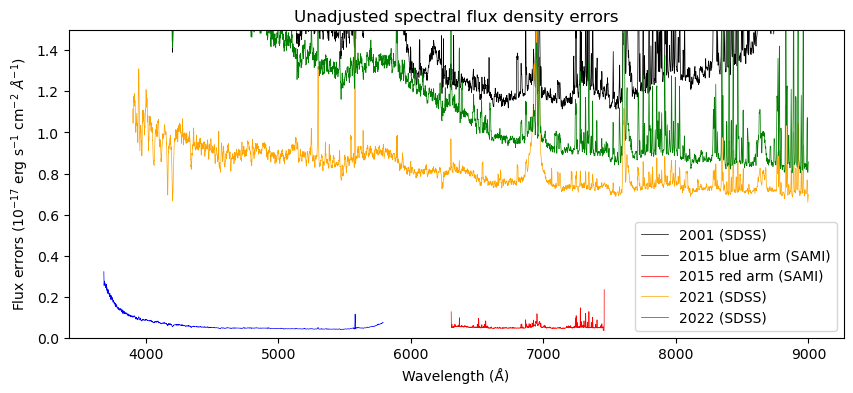

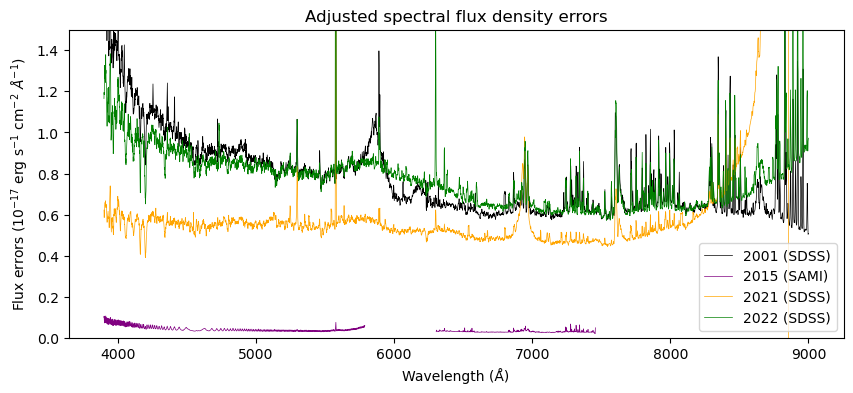

In [5]:
plotting.plot_spectra(
    ua_lam01, (ua_lam15_blue, ua_lam15_red), ua_lam21, ua_lam22,
    flux01=ua_err01,
    flux15=(ua_err15_blue, ua_err15_red),
    flux21=ua_err21,
    flux22=ua_err22,
    # x_bounds=h_alpha_lam_bounds,
    y_bounds=(0, 1.5),
    y_axis_label=f"Flux errors ({SFD_UNITS})",
    title=f"Unadjusted spectral flux density errors"
)

plotting.plot_spectra(
    lam, lam, lam, lam,
    flux01=adjusted_01_err_15,
    flux15=adjusted_15_err_15,
    flux21=adjusted_21_err_15,
    flux22=adjusted_22_err_15,
    # x_bounds=h_alpha_lam_bounds,
    y_bounds=(0, 1.5),
    y_axis_label=f"Flux errors ({SFD_UNITS})",
    title=f"Adjusted spectral flux density errors"
)


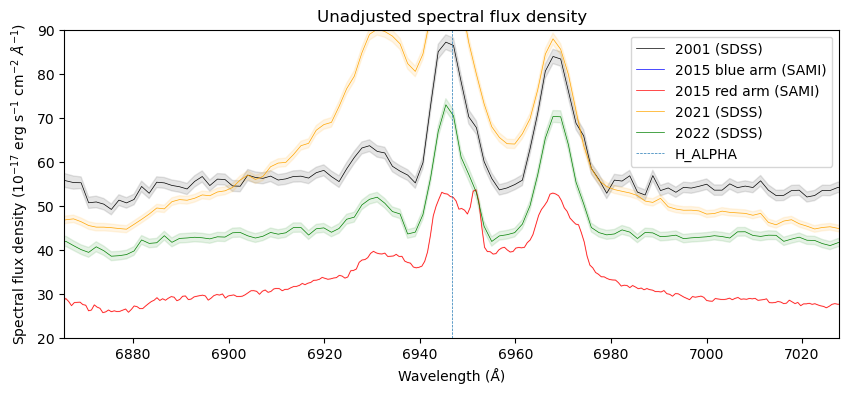

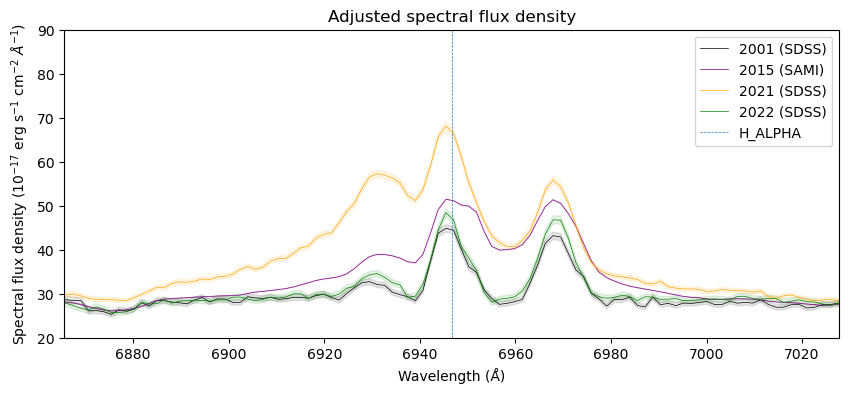

In [6]:
y_bounds = (20, 90)

plotting.plot_spectra(
    ua_lam01, (ua_lam15_blue, ua_lam15_red), ua_lam21, ua_lam22,
    ua_flux01,
    (ua_flux15_blue, ua_flux15_red),
    ua_flux21,
    ua_flux22,
    plot_errors=True,
    flux01_err=ua_err01,
    flux15_err=(ua_err15_blue, ua_err15_red),
    flux21_err=ua_err21,
    flux22_err=ua_err22,
    x_bounds=h_alpha_lam_bounds,
    y_bounds=y_bounds,
    ions = {"H_ALPHA": H_ALPHA},
    title=f"Unadjusted spectral flux density"
)

plotting.plot_spectra(
    lam, lam, lam, lam,
    adjusted_01_flux_15,
    adjusted_15_flux_15,
    adjusted_21_flux_15,
    adjusted_22_flux_15,
    plot_errors=True,
    flux01_err=adjusted_01_err_15,
    flux15_err=adjusted_15_err_15,
    flux21_err=adjusted_21_err_15,
    flux22_err=adjusted_22_err_15,
    x_bounds=h_alpha_lam_bounds,
    y_bounds=y_bounds,
    ions = {"H_ALPHA": H_ALPHA},
    title=f"Adjusted spectral flux density"
)

## Difference spectra

In [3]:
(diff_15, diff_21, diff_22), (diff_15_err, diff_21_err, diff_22_err) = difference.get_diff_spectra()

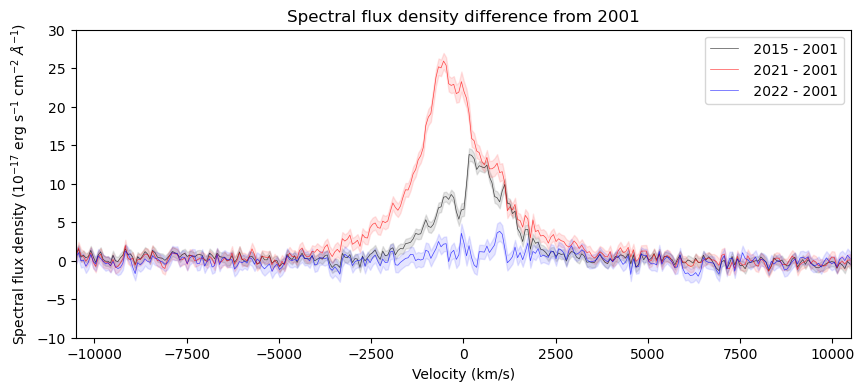

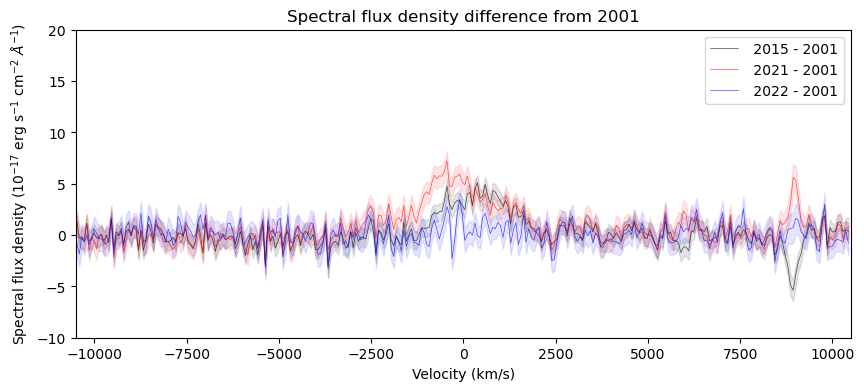

In [8]:
plotting.plot_diff_spectra(
    lam,
    diff_15=diff_15,
    diff_21=diff_21,
    diff_22=diff_22,
    diff_15_err=diff_15_err,
    diff_21_err=diff_21_err,
    diff_22_err=diff_22_err,
    plot_labels=None,
    # use_ang_x_axis=True,
    plot_centres=H_ALPHA
)
plotting.plot_diff_spectra(
    lam,
    diff_15=diff_15,
    diff_21=diff_21,
    diff_22=diff_22,
    diff_15_err=diff_15_err,
    diff_21_err=diff_21_err,
    diff_22_err=diff_22_err,
    plot_labels=None,
    # use_ang_x_axis=True,
    plot_centres=H_BETA
)

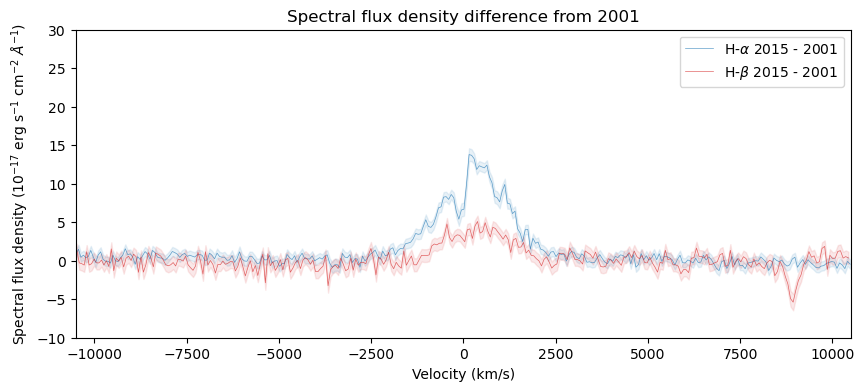

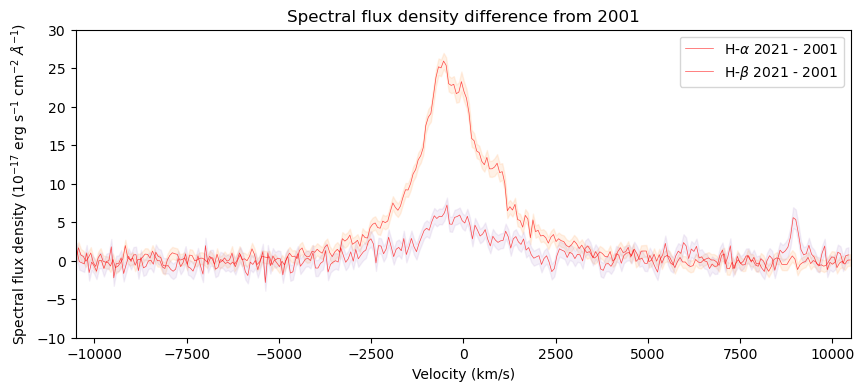

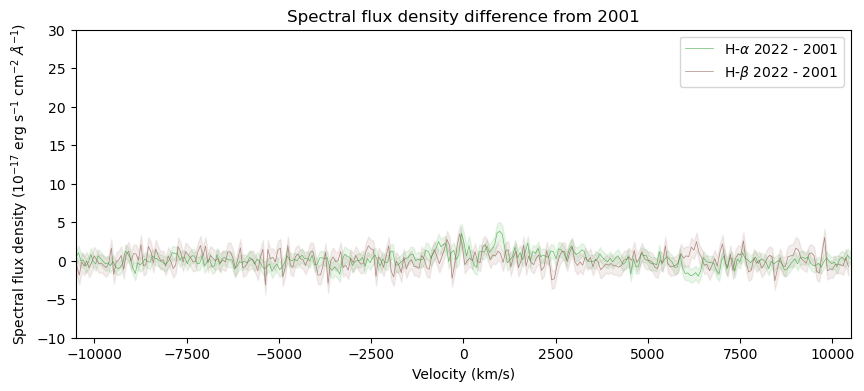

In [10]:
plotting.plot_diff_spectra(
    lam,
    diff_15=diff_15,
    diff_15_err=diff_15_err
)
plotting.plot_diff_spectra(
    lam,
    diff_21=diff_21,
    diff_21_err=diff_21_err
)
plotting.plot_diff_spectra(
    lam,
    diff_22=diff_22,
    diff_22_err=diff_22_err
)

## Flux integration

Comparison with photometry values

Balmer decrements